In [ ]:
import os, requests

fname = []
for j in range(3):
  fname.append('steinmetz_part%d.npz'%j)
url = ["https://osf.io/agvxh/download"]
url.append("https://osf.io/uv3mw/download")
url.append("https://osf.io/ehmw2/download")

for j in range(len(url)):
  if not os.path.isfile(fname[j]):
    try:
      r = requests.get(url[j])
    except requests.ConnectionError:
      print("!!! Failed to download data !!!")
    else:
      if r.status_code != requests.codes.ok:
        print("!!! Failed to download data !!!")
      else:
        with open(fname[j], "wb") as fid:
          fid.write(r.content)

In [19]:
from matplotlib import rcParams 
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
rcParams['figure.figsize'] = [20, 10]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

In [ ]:
import numpy as np

alldat = np.array([])
for j in range(len(fname)):
  alldat = np.hstack((alldat, np.load('steinmetz_part%d.npz'%j, allow_pickle=True)['dat']))

# select just one of the recordings here. 11 is nice because it has some neurons in vis ctx. 
dat = alldat[11]
print(dat.keys())

In [ ]:
import gc
gc.collect()

In [ ]:
#@title basic plots of population average
from matplotlib import pyplot as plt
dt = dat['bin_size'] # binning at 10 ms
NT = dat['spks'].shape[-1]

ax = plt.subplot(1,5,1)
response = dat['response'] # right - nogo - left (-1, 0, 1)
vis_right = dat['contrast_right'] # 0 - low - high
vis_left = dat['contrast_left'] # 0 - low - high
plt.plot(dt * np.arange(NT), 1/dt * dat['spks'][:,response>=0].mean(axis=(0,1))) # left responses
plt.plot(dt * np.arange(NT), 1/dt * dat['spks'][:,response<0].mean(axis=(0,1))) # right responses
plt.plot(dt * np.arange(NT), 1/dt * dat['spks'][:,vis_right>0].mean(axis=(0,1))) # stimulus on the right
plt.plot(dt * np.arange(NT), 1/dt * dat['spks'][:,vis_right==0].mean(axis=(0,1))) # no stimulus on the right

plt.legend(['left resp', 'right resp', 'right stim', 'no right stim'], fontsize=12)
ax.set(xlabel  = 'time (sec)', ylabel = 'firing rate (Hz)');

In [ ]:
print("dat['spks']:",type(dat['spks']), "shape:",np.shape(dat['spks']))
print("dat['spks'][i]",type(dat['spks'][0]), "shape:",np.shape(dat['spks'][0]))
print("dat['spks'][i][j]",type(dat['spks'][0][0]), "shape:",np.shape(dat['spks'][0][0]))

In [ ]:
def plot_firing_rate_single(trial):
    plt.plot(np.mean(dat['spks'][trial],0)/dt)
    plt.xlabel('Binned Time (10ms)')
    plt.ylabel('Avg Firing Rate (Hz)')
    plt.title("Avg Firing Rate for all neurons in trial "+str(trial))
    plt.show()

for trial in range(340):
    plot_firing_rate_single(trial)

In [ ]:
# groupings of brain regions
regions = ["vis ctx", "thal", "hipp", "other ctx", "midbrain", "basal ganglia", "cortical subplate", "other"]
brain_groups = [["VISa", "VISam", "VISl", "VISp", "VISpm", "VISrl"], # visual cortex
                ["CL", "LD", "LGd", "LH", "LP", "MD", "MG", "PO", "POL", "PT", "RT", "SPF", "TH", "VAL", "VPL", "VPM"], # thalamus
                ["CA", "CA1", "CA2", "CA3", "DG", "SUB", "POST"], # hippocampal
                ["ACA", "AUD", "COA", "DP", "ILA", "MOp", "MOs", "OLF", "ORB", "ORBm", "PIR", "PL", "SSp", "SSs", "RSP"," TT"], # non-visual cortex
                ["APN", "IC", "MB", "MRN", "NB", "PAG", "RN", "SCs", "SCm", "SCig", "SCsg", "ZI"], # midbrain
                ["ACB", "CP", "GPe", "LS", "LSc", "LSr", "MS", "OT", "SNr", "SI"], # basal ganglia 
                ["BLA", "BMA", "EP", "EPd", "MEA"] # cortical subplate
                ]

In [ ]:
print("dat['brain_area']:",type(dat['brain_area']), "shape:",np.shape(dat['brain_area']))
print(dat['brain_area'][5])

In [ ]:
np.unique(dat['brain_area'])

In [ ]:
NN = (len(dat['brain_area']))
n_regions = len(regions)
region_index = np.ones(NN)*n_regions
group_index = np.ones(NN)*n_regions
for region in range(len(regions)-1):
    region_index[np.isin(dat['brain_area'], brain_groups[region])] = region
    for group in range(len(brain_groups[region])):
        group_index[np.isin(dat['brain_area'],brain_groups[region][group])] = group

(79, 340, 250)


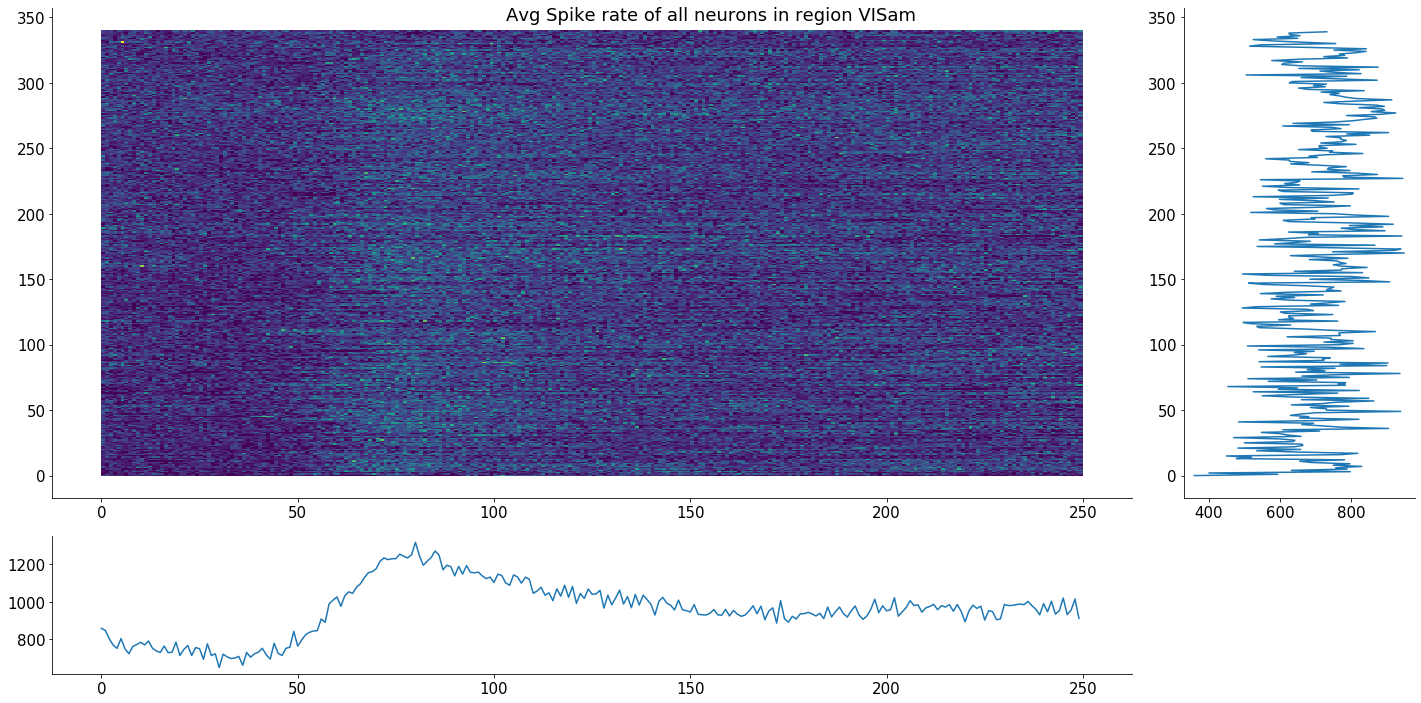

(66, 340, 250)


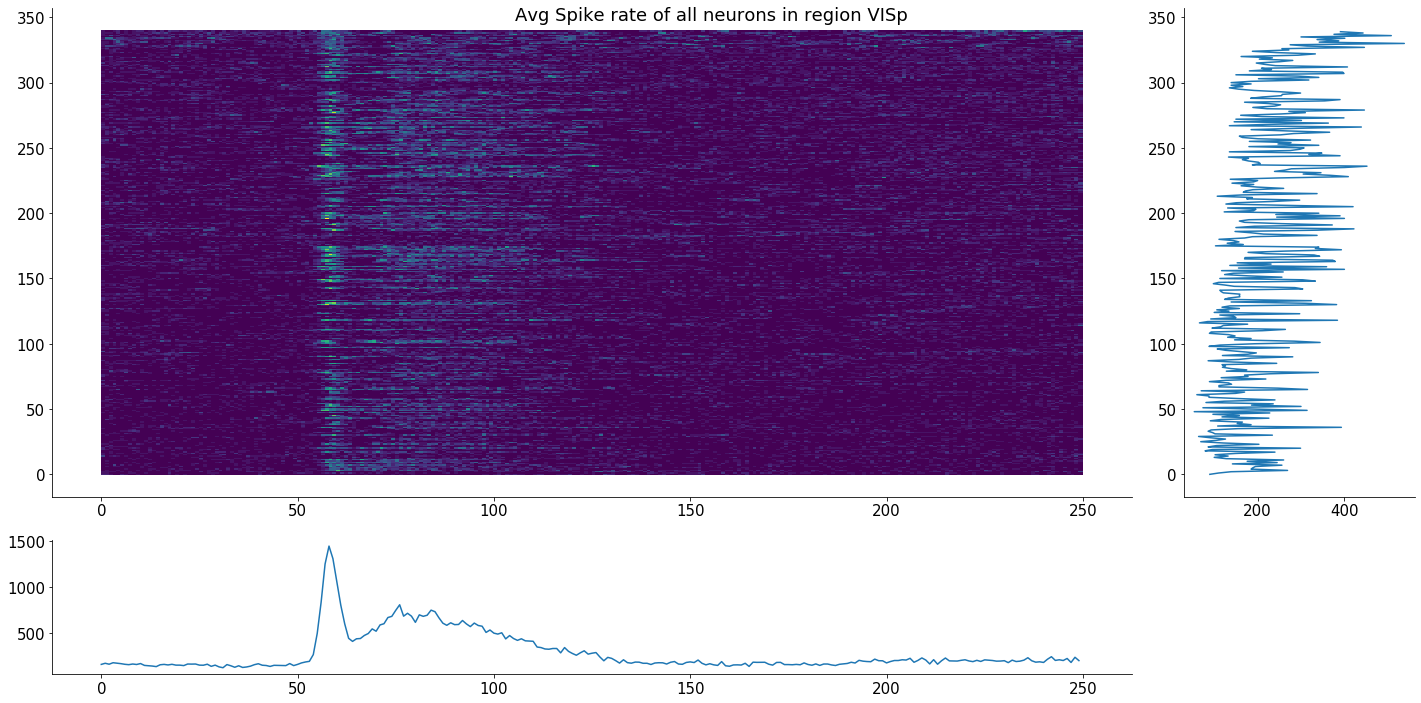

(11, 340, 250)


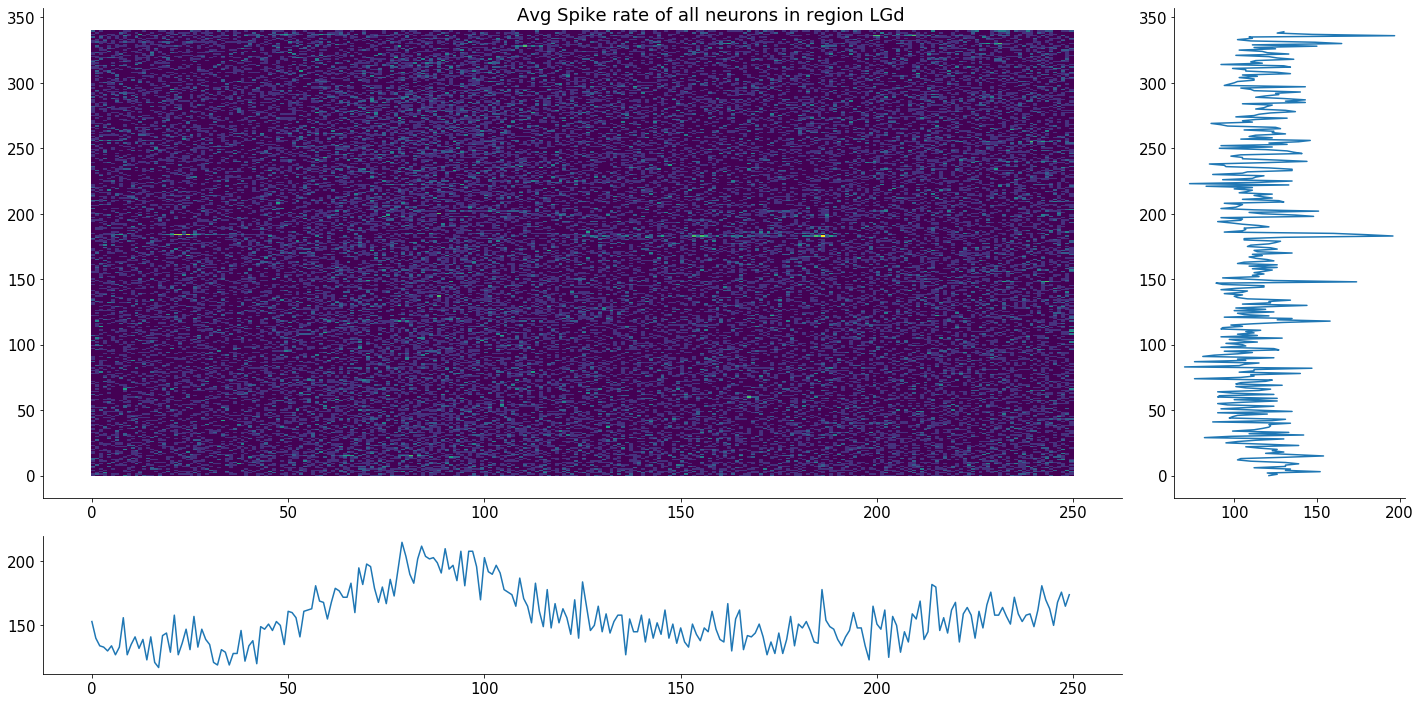

(18, 340, 250)


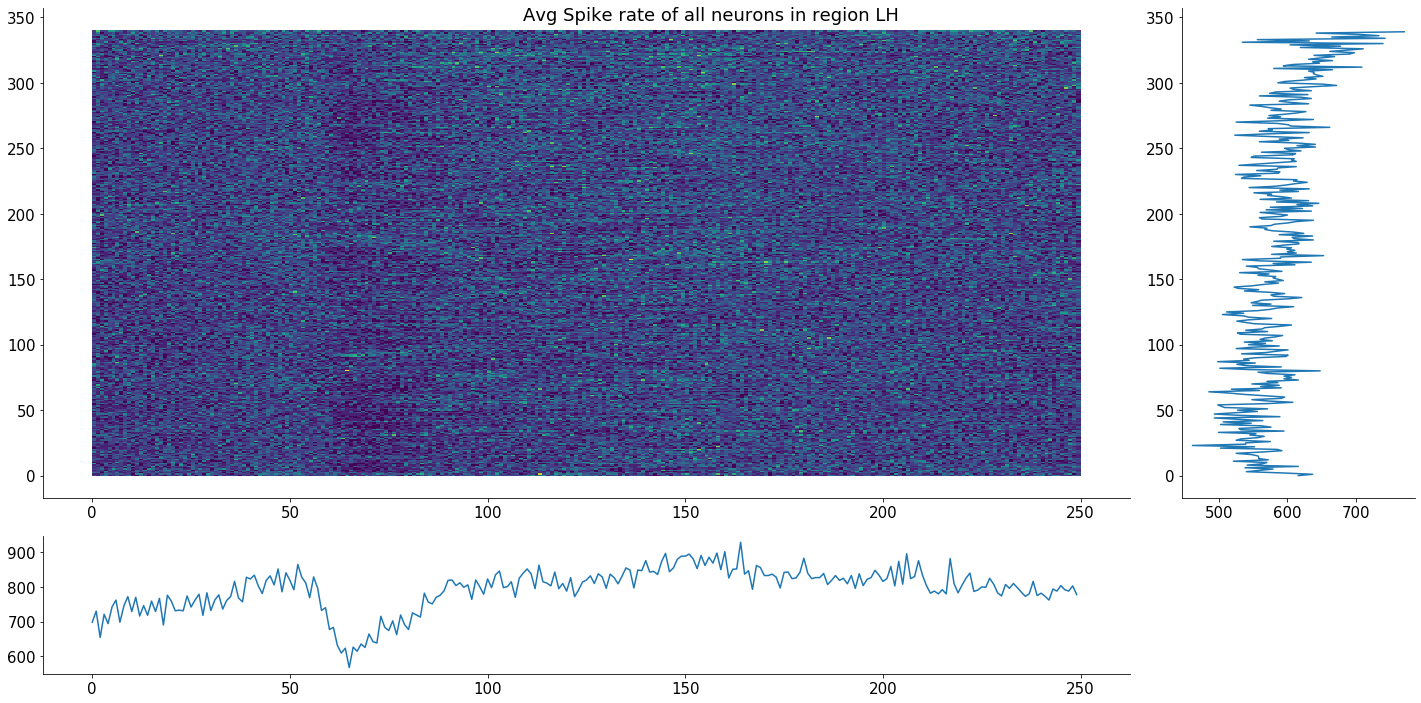

(126, 340, 250)


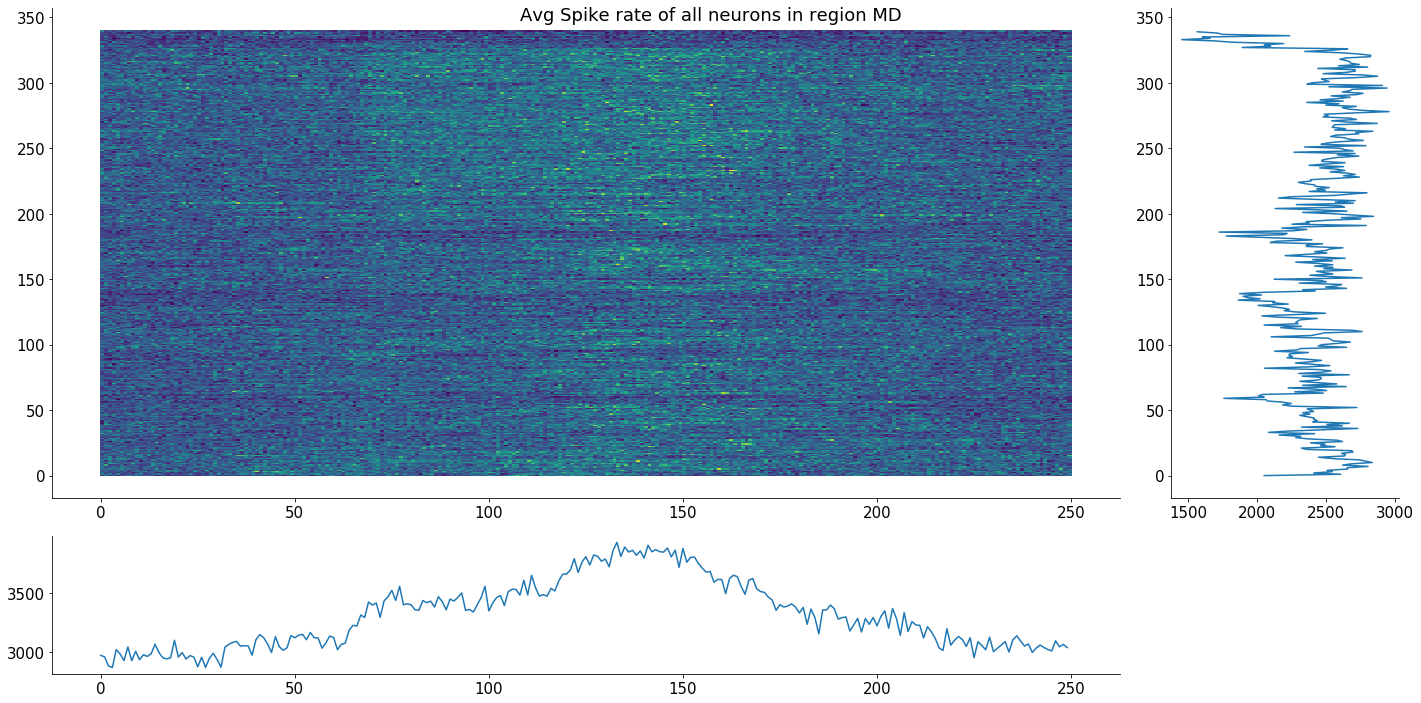

(50, 340, 250)


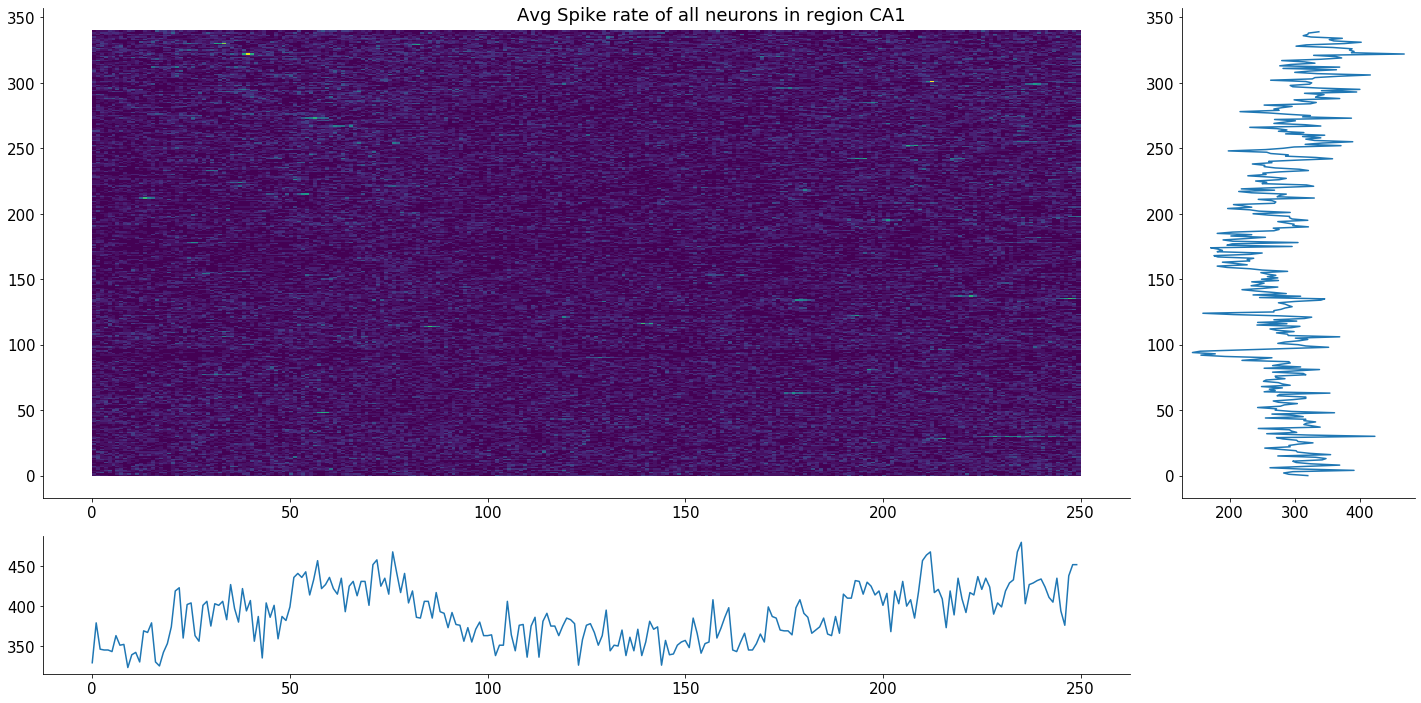

(65, 340, 250)


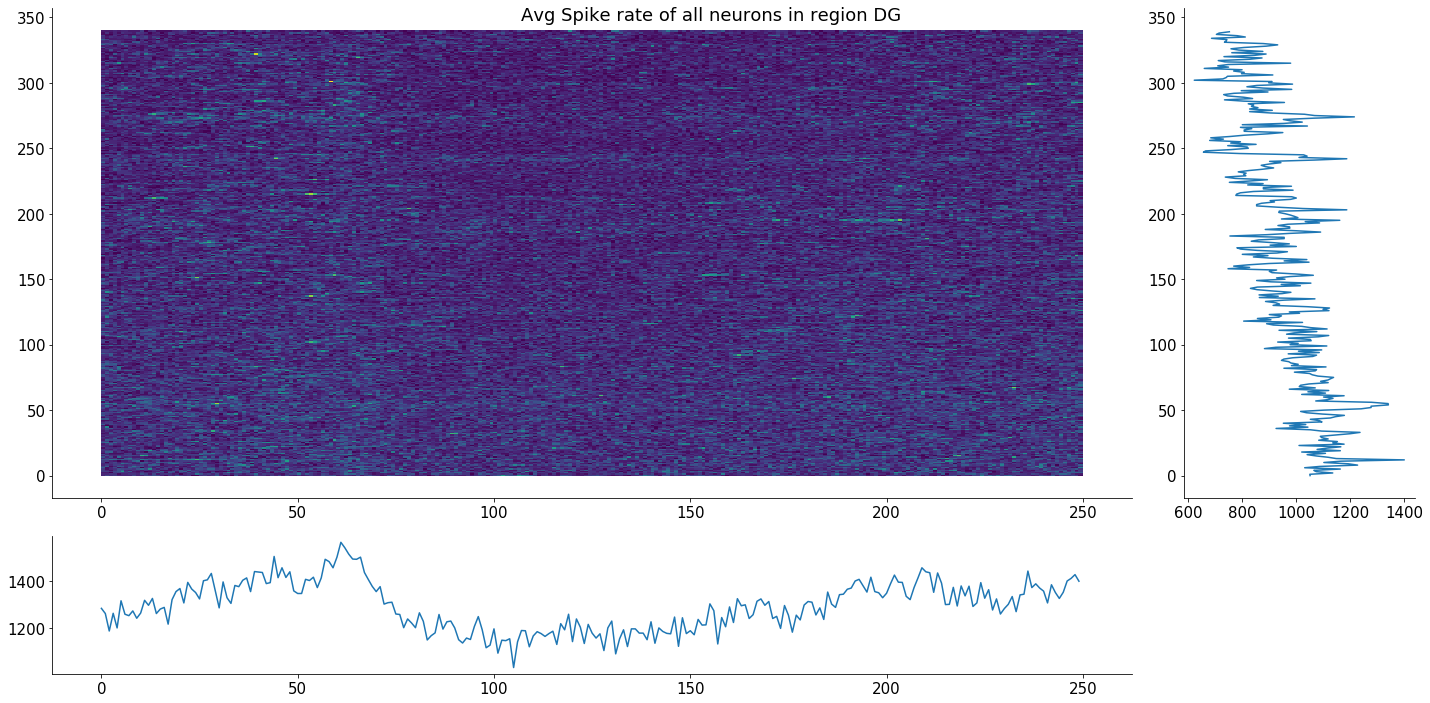

(105, 340, 250)


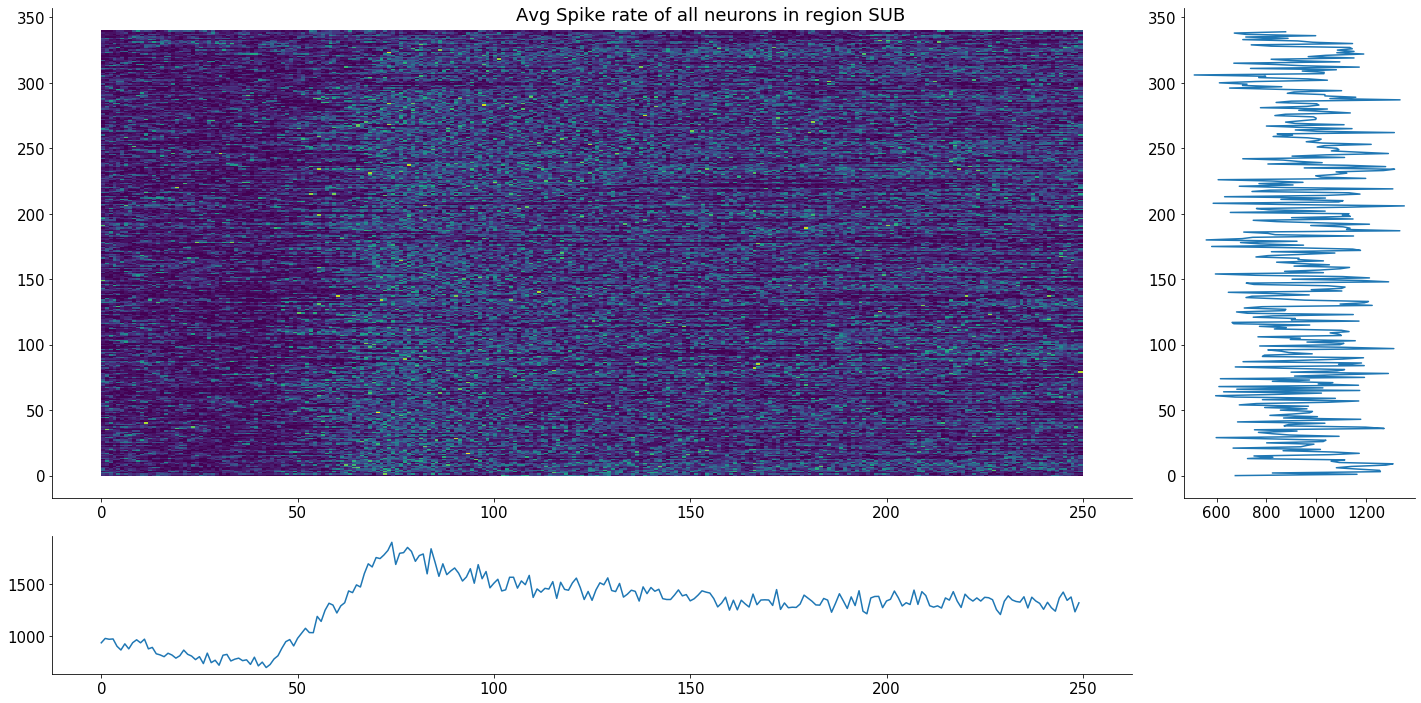

(16, 340, 250)


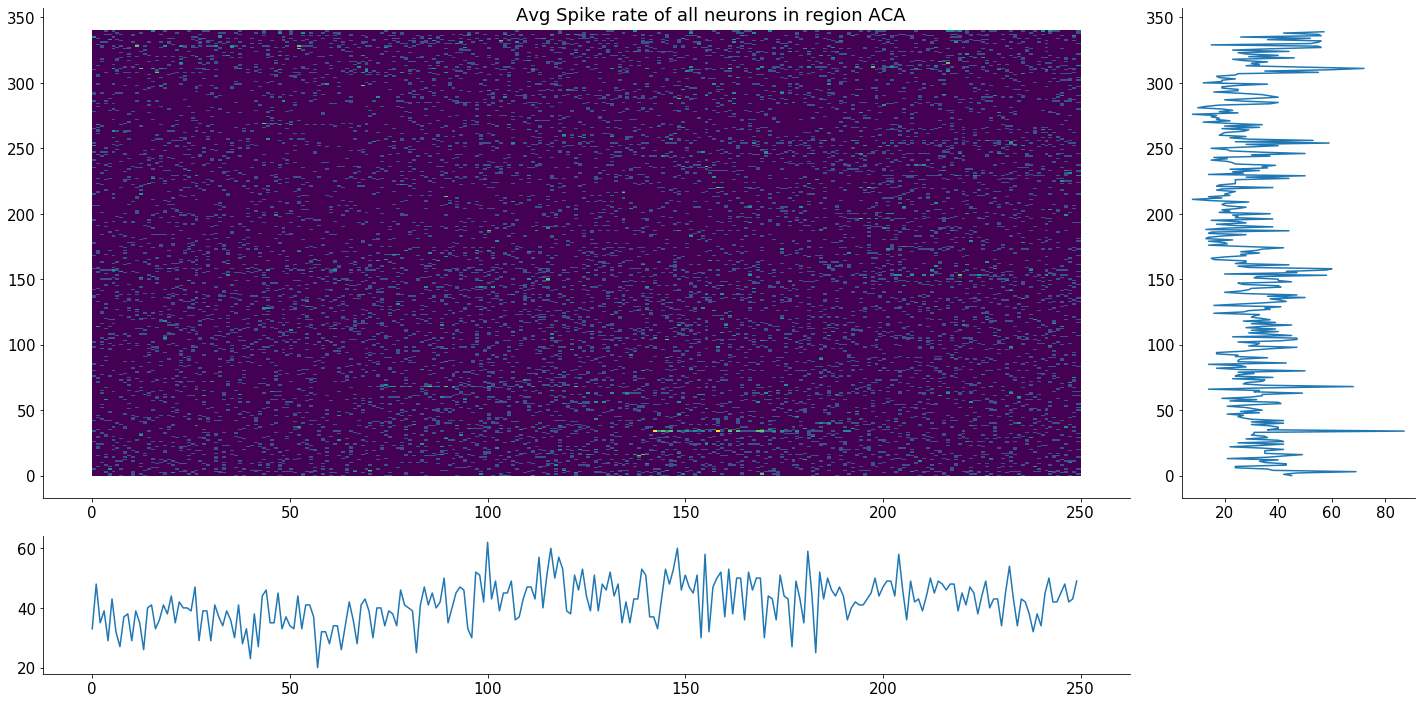

(6, 340, 250)


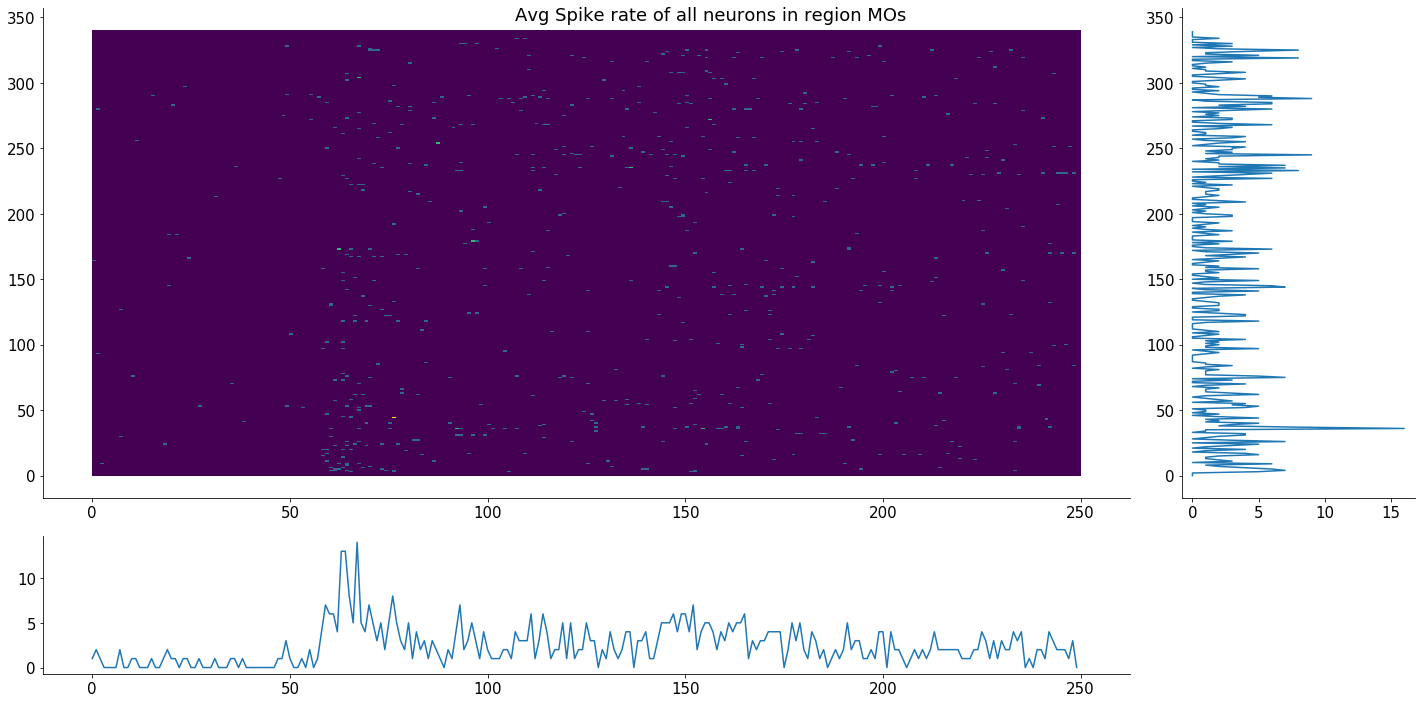

(56, 340, 250)


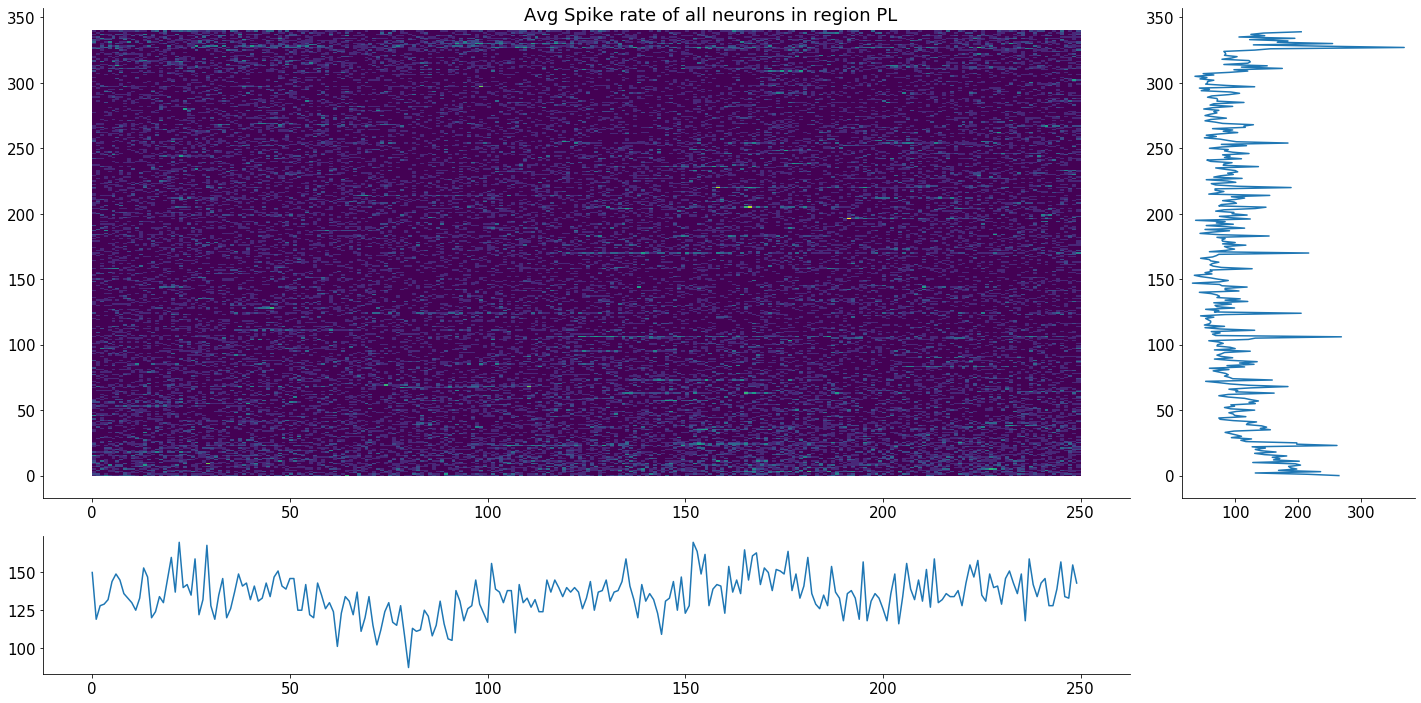

In [54]:
def avg_pcolormesh(region,spikes):
    for group in range(len(brain_groups[region])):
        if np.sum(np.logical_and(region_index==region,group_index == group)):
            print(np.shape(spikes[:][np.logical_and(region_index==region,group_index == group),:]))
            
            fig = plt.figure(constrained_layout=False)
            gs = fig.add_gridspec(4, 5)
            fig_raster= fig.add_subplot(gs[:3, :4])
            fig_avg_trial = fig.add_subplot(gs[3,:4], sharex=fig_raster)
            fig_avg_time = fig.add_subplot(gs[:3,4],sharey=fig_raster)
            fig.suptitle("Avg Spike rate of all neurons in region "+brain_groups[region][group])
            fig_raster.pcolormesh(np.mean(spikes[:][np.logical_and(region_index==region,group_index == group),:],axis=0))
            fig_avg_trial.plot(np.sum(spikes[:][np.logical_and(region_index==region,group_index == group),:],axis=(0,1)))
            fig_avg_time.plot(np.sum(spikes[:][np.logical_and(region_index==region,group_index == group),:],axis=(0,2)),range(340))
#             fig.colorbar(fig_raster)
#             fig_raster.ylabel("Trials")
#             fig_raster.xlabel("Binned Time")
#             fig_raster.axis()
#             fig.colorbar(ax=ax)
            plt.show()
            
avg_pcolormesh(0,dat['spks'])
avg_pcolormesh(1,dat['spks'])
avg_pcolormesh(2,dat['spks'])
avg_pcolormesh(3,dat['spks'])
avg_pcolormesh(4,dat['spks'])

In [ ]:
gc.collect()

In [ ]:
t_goCue = np.around(dat['gocue'],2)
t_goCue = (t_goCue*100).astype(int)
no_of_neurons, no_of_trials, total_time= np.shape(dat['spks'])
spikes_goCue = np.zeros((no_of_neurons,no_of_trials,50))
                       
for trial in range(no_of_trials):

    spikes_goCue[:,trial,:] = dat['spks'][:,trial,int(t_goCue[trial]) - 25:int(t_goCue[trial]) + 25]

In [ ]:
def gather_bins(spikes, times,trim_left, trim_right):
    times = (times*100).astype(int)
#     print(times)
    no_of_neurons, no_of_trials, total_time= np.shape(spikes)
    extracted_bin = np.zeros((no_of_neurons,no_of_trials,trim_left+trim_right))

    for trial in range(no_of_trials):
#         print(int(times[trial]) - 25)
        extracted_bin[:,trial,:] = spikes[:,trial,int(times[trial]) - trim_left:int(times[trial]) + trim_right]
    return extracted_bin

In [ ]:
spikes_visualStim = gather_bins(dat['spks'],np.ones_like(dat['gocue'])*0.5,50,50)
for i in range(7):
    avg_pcolormesh(i,spikes_visualStim)

In [ ]:
spikes_goCue = gather_bins(dat['spks'],50+dat['gocue'],25,25)
for i in range(7):
    avg_pcolormesh(i,spikes_goCue)

In [ ]:
spikes_response = gather_bins(dat['spks'],0.05+dat['response_time'],1,2)
for i in range(7):
    avg_pcolormesh(i,spikes_response)

In [ ]:
spikes_feedback = gather_bins(dat['spks'],50+dat['feedback_time'],20,0)
for i in range(7):
    avg_pcolormesh(i,spikes_feedback)